# Proyecto de Regresión con Scikit-learn
### Dataset: housing.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## Cargar y explorar el dataset

In [ ]:
df = pd.read_csv("../data/1553768847-housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
# Información general
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532    

## Análisis Exploratorio de Datos (EDA)

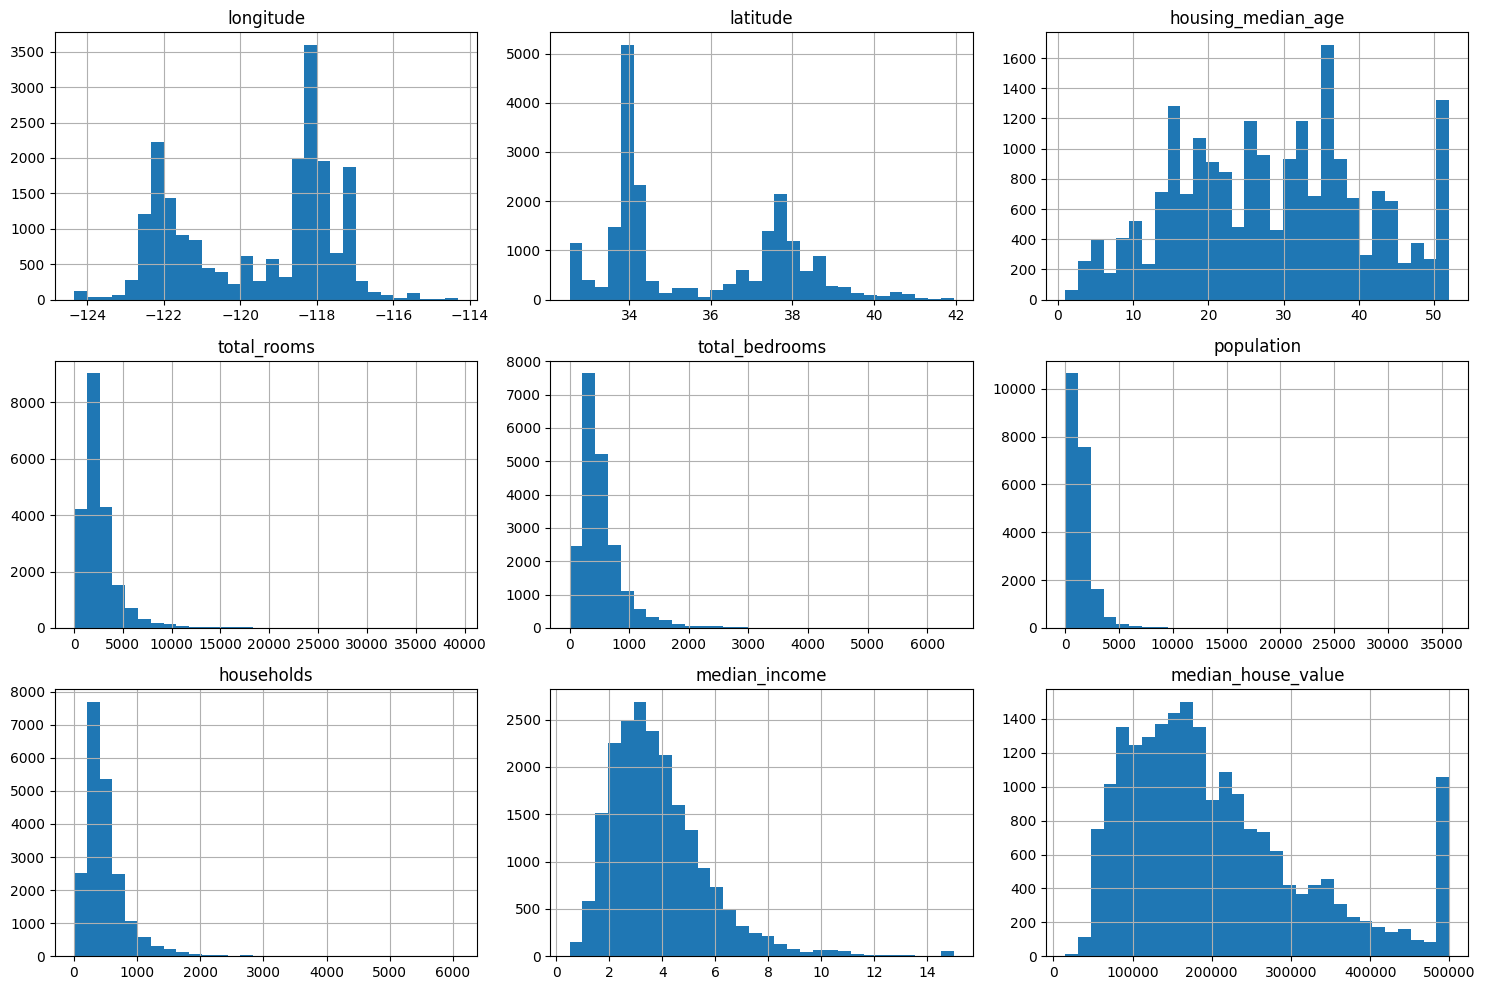

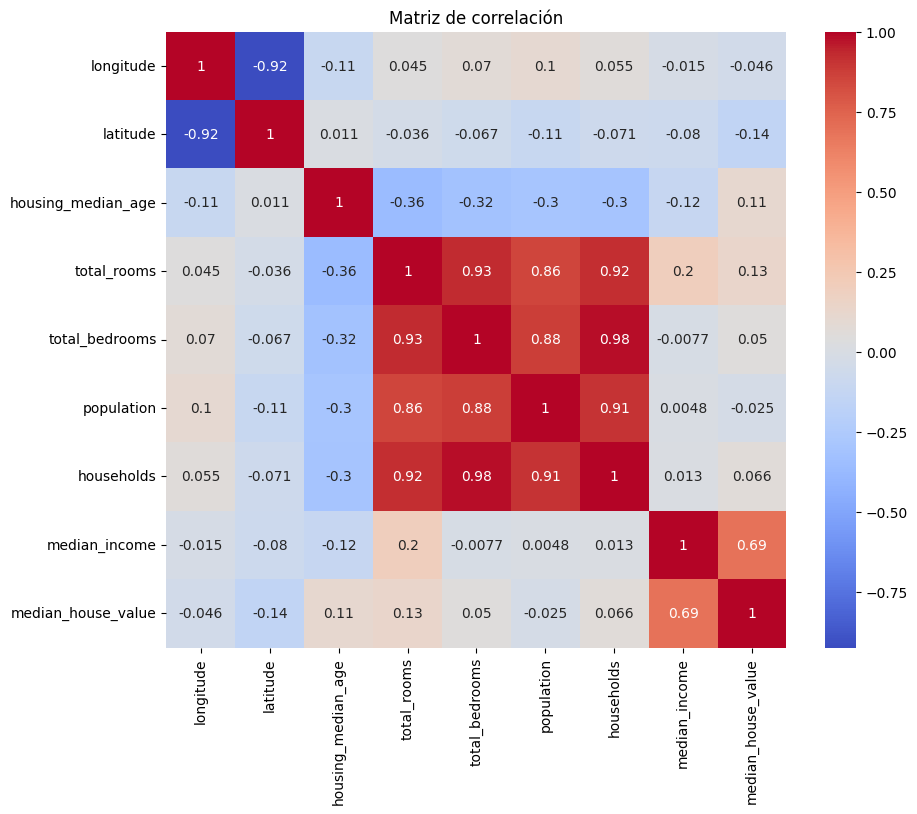

In [4]:
# Gráficos básicos
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

## Preprocesamiento

In [5]:
# Define variables (modificar 'median_house_value' si es diferente)
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

## División de datos

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Función para evaluar modelos

In [7]:
def evaluar_modelo(modelo, nombre):
    y_pred = modelo.predict(X_test)
    print(f"\n{nombre}:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))

## Entrenamiento y evaluación de modelos

In [8]:
modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "BayesianRidge": BayesianRidge(),
    "KNeighbors": KNeighborsRegressor(),
    "RandomForest": RandomForestRegressor(),
    "SVR": SVR(),
    "MLPRegressor": MLPRegressor(max_iter=1000)
}

for nombre, modelo in modelos.items():
    pipeline = make_pipeline(preprocessor, modelo)
    pipeline.fit(X_train, y_train)
    evaluar_modelo(pipeline, nombre)


LinearRegression:
MAE: 50702.168910309934
MSE: 4904409297.414929
R2 Score: 0.6257344555133746

Ridge:
MAE: 50708.66893675914
MSE: 4905379192.30927
R2 Score: 0.6256604408423485

Lasso:
MAE: 50703.4041214562
MSE: 4904569938.244294
R2 Score: 0.6257221966818165

BayesianRidge:
MAE: 50713.08597008921
MSE: 4906232158.169032
R2 Score: 0.62559534926606

KNeighbors:
MAE: 40886.5632751938
MSE: 3784019398.6369767
R2 Score: 0.7112337093632657

RandomForest:
MAE: 31646.280104166668
MSE: 2394355969.8849554
R2 Score: 0.8172817792274933

SVR:
MAE: 87042.52954545878
MSE: 13669676053.714302
R2 Score: -0.04316104977123625

MLPRegressor:
MAE: 48764.81309769564
MSE: 4621426453.116453
R2 Score: 0.6473294574553143


## Función para predecir con nuevos datos en .csv

In [ ]:
def predecir_nueva_data(nombre_archivo_csv, modelo_entrenado):
    nueva_data = pd.read_csv(nombre_archivo_csv)
    predicciones = modelo_entrenado.predict(nueva_data)
    return predicciones

## Instrucciones para documentación del informe
- Incluye gráficas EDA
- Comparación de métricas
- Justificación del mejor modelo
- Flujo de predicción con CSV externo
- Hiperparámetros usados